<a href="https://colab.research.google.com/github/dudcoco/machine_deep_learning/blob/main/python_week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World")

Hello World


In [4]:
import pandas as pd

file_path = "/content/sample_data/california_housing_train.csv"

df = pd.read_csv(file_path)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

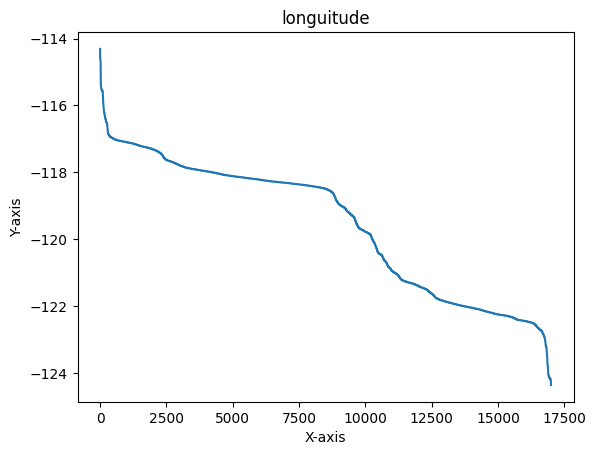

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(df['longitude'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("longuitude")
plt.show()

In [7]:
statistics = df.describe()

print(statistics)

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [8]:
correlation_matrix = df.corr()

print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_

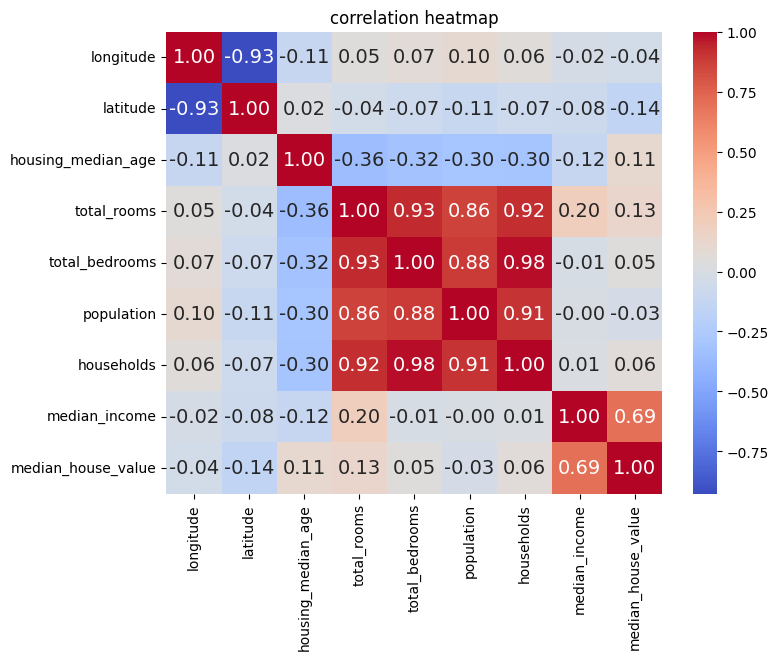

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size":14})
plt.title("correlation heatmap")
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[df.columns[:-1]]
y = df['median_house_value']

model = LinearRegression()
model.fit(X, y)

coefficients = pd.DataFrame({"변수":X.columns, "회귀 계수":model.coef_})
print(coefficients)

                   변수         회귀 계수
0           longitude -43139.637258
1            latitude -42925.673088
2  housing_median_age   1150.694932
3         total_rooms     -8.378251
4      total_bedrooms    117.648543
5          population    -38.488772
6          households     45.436003
7       median_income  40507.068359


Text(0.5, 1.0, 'Real Value vs. Predicted Value')

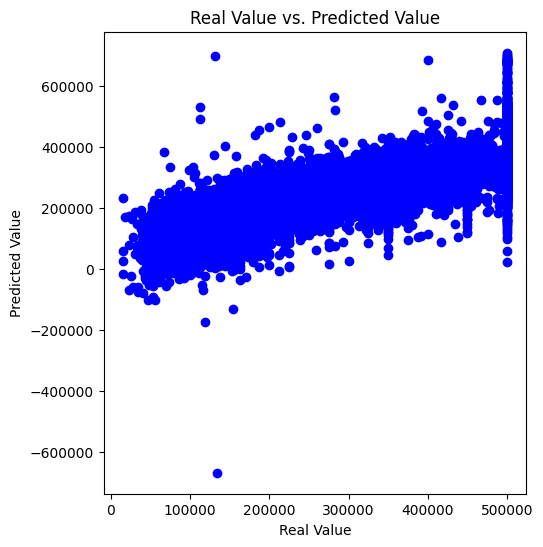

In [12]:
predictions = model.predict(X)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(y, predictions, color="blue")
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.title("Real Value vs. Predicted Value")

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df["target"] = iris.target

print(iris_df.head())
print("========================")
print(iris_df['target'].value_counts())
print("========================")
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
0    50
1    50
2    50
Name: target, dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%         

In [14]:
from scipy.stats import f_oneway

iris_df['target'] = iris.target

class_0 = iris_df[iris_df['target'] == 0].drop(columns=['target'])
class_1 = iris_df[iris_df['target'] == 1].drop(columns=['target'])
class_2 = iris_df[iris_df['target'] == 2].drop(columns=['target'])

anova_results = f_oneway(class_0, class_1, class_2)

anova_df = pd.DataFrame({
    'Feature':iris.feature_names,
    'F-statistic':anova_results.statistic,
    'P-value':anova_results.pvalue
})

print(anova_df)

             Feature  F-statistic       P-value
0  sepal length (cm)   119.264502  1.669669e-31
1   sepal width (cm)    49.160040  4.492017e-17
2  petal length (cm)  1180.161182  2.856777e-91
3   petal width (cm)   960.007147  4.169446e-85


In [16]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
feature_names = iris.feature_names

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_components_df = pd.DataFrame(data=pca.components_, columns=feature_names)
print("주성분의 가중치")
print(pca_components_df)

주성분의 가중치
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481


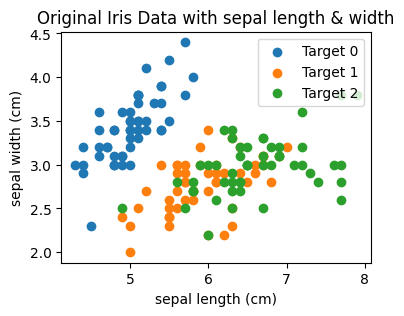

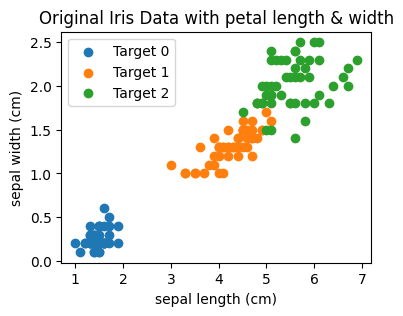

In [18]:
plt.figure(figsize=(4,3))
for target in range(3):
  subset = iris_df[iris_df['target'] == target]
  plt.scatter(subset[feature_names[0]], subset[feature_names[1]], label=f'Target {target}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Iris Data with sepal length & width')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
for target in range(3):
  subset = iris_df[iris_df['target'] == target]
  plt.scatter(subset[feature_names[2]], subset[feature_names[3]], label=f'Target {target}')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Iris Data with petal length & width')
plt.legend()
plt.show()